In [3]:

import os ,shutil
import keras

In [22]:
from keras import layers,models
model=models.Sequential()
model.add(layers.Conv2D(32,(3,3),activation="relu",input_shape=(150,150,3)))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64,(3,3),activation="relu"))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(128,(3,3),activation="relu"))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(128,(3,3),activation="relu"))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Flatten())
model.add(layers.Dense(512,activation="relu"))
model.add(layers.Dense(5,activation="softmax"))

In [23]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 15, 15, 128)       147584    
__________

In [29]:
from keras import optimizers
model.compile(loss="categorical_crossentropy",optimizer=optimizers.RMSprop(lr=1e-4),metrics=["accuracy"])
train_dir="./data/train/"
validation_dir="./data/valid/"

In [30]:
#datapreprocessing
from keras.preprocessing.image import ImageDataGenerator
train_datagen=ImageDataGenerator(rescale=1./255)
test_datagen=ImageDataGenerator(rescale=1./255)
train_generator=train_datagen.flow_from_directory(train_dir,target_size=(150,150),batch_size=20,class_mode="categorical")
#validation_generator=test_datagen.flow_from_directory(validation_dir,target_size=(150,150),batch_size=20,class_mode="binary")

Found 150 images belonging to 5 classes.


In [27]:
for data_batch,label_batch in train_generator:
    print(data_batch.shape,label_batch.shape)
    break
len(train_generator)

(20, 150, 150, 3) (20, 5)


8

In [31]:
history=model.fit_generator(train_generator,steps_per_epoch=100,epochs=10)
#model.save('catvsdog.h5')

Epoch 1/10
100/100 [==============================] - 124s 1s/step - loss: 0.3617 - acc: 0.8945
Epoch 2/10
100/100 [==============================] - 122s 1s/step - loss: 0.1334 - acc: 0.9720
Epoch 3/10
100/100 [==============================] - 122s 1s/step - loss: 0.0462 - acc: 0.9895
Epoch 4/10
100/100 [==============================] - 122s 1s/step - loss: 0.0354 - acc: 0.9905
Epoch 5/10
100/100 [==============================] - 124s 1s/step - loss: 0.0165 - acc: 0.9955
Epoch 6/10
100/100 [==============================] - 130s 1s/step - loss: 0.0368 - acc: 0.9930
Epoch 7/10
100/100 [==============================] - 138s 1s/step - loss: 0.0253 - acc: 0.9940
Epoch 8/10
100/100 [==============================] - 134s 1s/step - loss: 0.0105 - acc: 0.9980
Epoch 9/10
100/100 [==============================] - 131s 1s/step - loss: 2.5828e-04 - acc: 1.0000
Epoch 10/10
100/100 [==============================] - 132s 1s/step - loss: 0.0397 - acc: 0.9940


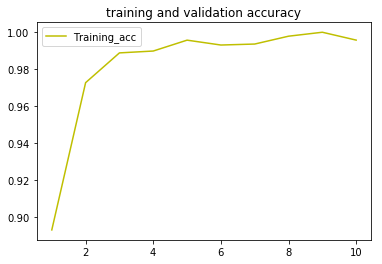

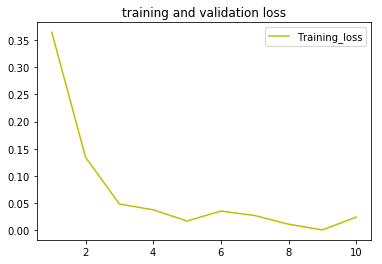

In [32]:
import matplotlib.pyplot as plt
acc=history.history["acc"]
#val_acc=history.history["val_acc"]
loss=history.history["loss"]
#val_loss=history.history["val_loss"]
epochs=range(1,len(acc)+1)
plt.plot(epochs,acc,"y",label="Training_acc")
#plt.plot(epochs,val_acc,'b',label="validation_acc")
plt.title("training and validation accuracy")
plt.legend()
plt.figure()
plt.plot(epochs,loss,"y",label="Training_loss")
#plt.plot(epochs,val_loss,'b',label="validation_loss")
plt.title("training and validation loss")
plt.legend()
plt.show()